# K-means 클러스터링 실습

각 데이터 포인트와 각 그룹  평균 사이의 거리(Euclidean distance)를 구한 후 가장 가까운 클러스터로 배정하는 방법

##### 알고리즘

1. 그룹 평균 초기화: k번쨰 그룹의 평균을 $\mathbf m ^{(k)}$이라고 한다. 첫 과정은 각 그룹의 평균 $\mathbf m ^{(k)}$을 초기화 하는 것인데, 가장 기본적인 방법으로 랜덤으로 그룹의 평균을 설정한다.
2. 그룹 할당: 각 데이터 포인트와 가장 가까운 그룹 평균에 해당하는 그룹에 데이터 포인트를 할당한다. 
3. 평균 업데이트: 모든 데이터 포인트가 그룹에 속한 뒤, 각 그룹에 대한 새로운 평균값을 구한다.
4. 반복 : 2단계 즉, 기존의 클러스터와 새로 할당된 클러스터가 차이가 없을 때까지 2-3단계를 반복한다. 
---

##### 11.2.2 임의로 데이터를 생성하여 클러스터링 해보는 실습.

# Data generating
## 임의 데이터 생성

In [1]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 100,     # 100개, 피처의 개수는 2, 5개의 그룹을 중심으로 샘플 데이터 생성
                 n_features = 2,
                 centers = 5,
                 random_state = 10)

## 생성된 데이터 차원 확인

In [3]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


피처 데이터는 2차원 데이터 100개가 생성되어있다. 타깃 데이터의 차원은 1차원 데이터가 100개 생성되어있는 상태. (100행 1열)

## unlabeled data plot

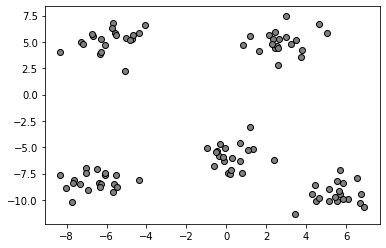

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],       # 피처 1과 2가 각각 x, y축으로 스캐터플롯 그리기
           c = 'gray',
           edgecolor = 'black',
           marker = 'o')
plt.show()

# K-Means Clustering
## clustering

In [6]:
from sklearn.cluster import KMeans

kmc = KMeans(n_clusters = 5,        # k = 5, init = 첫 번째 평균값을 어떻게 정할지, max_iter = 최대 몇 번 반복할 것인지.
            init = 'random',
            max_iter = 100,
            random_state = 0)
kmc.fit(X)
label_kmc = kmc.labels_

In [7]:
# 각 데이터 포인트가 어디에 속하게 되었는지 확인

label_kmc

array([2, 4, 3, 1, 0, 2, 2, 3, 0, 2, 3, 2, 0, 1, 0, 2, 4, 1, 0, 2, 2, 1,
       4, 3, 2, 2, 1, 0, 3, 4, 1, 1, 0, 1, 2, 0, 3, 1, 3, 4, 1, 1, 1, 0,
       3, 3, 2, 0, 4, 0, 4, 0, 2, 3, 0, 0, 1, 4, 1, 3, 0, 4, 4, 1, 2, 4,
       0, 4, 0, 3, 3, 2, 4, 0, 1, 1, 3, 4, 2, 2, 0, 0, 4, 1, 4, 3, 1, 3,
       1, 3, 4, 3, 2, 4, 4, 4, 3, 2, 2, 3], dtype=int32)

## to data frame

In [8]:
# 시각화를 위해 데이터 프레임으로 만들어준다
import pandas as pd

kmc_columns = ['kmc_comp1', 'kmc_comp2']           # 피처 이름 
X_kmc_df = pd.DataFrame(X, columns = kmc_columns)  # 데이터 프레임 생성
X_kmc_df['target'] = y                             # 정답에 해당하는 데이터를 새로운 열로 추가
X_kmc_df['label_kmc'] = label_kmc                  # 클러스터링하여 정해진 라벨을 열에 추가
X_kmc_df.head(5)

,kmc_comp1,kmc_comp2,target,label_kmc
0,-5.577854,5.872988,3,2
1,1.627832,4.178069,1,4
2,-6.950884,-9.024594,4,3
3,-0.952769,-5.034316,2,1
4,6.550104,-7.912339,0,0


In [9]:
# 타깃 데이터의 이름 : 0, 1, 2, 3, 4
# set 함수는 python에서 데이터 리스트에서 유일값만 보여주는 함수 : set이라는 클래스로 출력된다.
print(set(X_kmc_df['target']))

# kmc 군집의 이름을 확인
print(set(X_kmc_df['label_kmc']))

{0, 1, 2, 3, 4}
{0, 1, 2, 3, 4}
